Epoch     0, loss 8.351, accuracy 0.200
Epoch     1, loss 6.612, accuracy 0.400
Epoch     2, loss 7.866, accuracy 0.500
Epoch     3, loss 4.826, accuracy 0.600
Epoch     4, loss 3.725, accuracy 0.700
Epoch     5, loss 2.799, accuracy 0.800
Epoch     6, loss 2.319, accuracy 0.800
Epoch     7, loss 2.013, accuracy 0.800
Epoch     8, loss 1.786, accuracy 0.900
Epoch     9, loss 0.890, accuracy 1.000
Epoch    10, loss 0.496, accuracy 1.000
Epoch    11, loss 0.282, accuracy 1.000
Epoch    12, loss 0.220, accuracy 1.000
Epoch    13, loss 0.158, accuracy 1.000
Epoch    14, loss 0.123, accuracy 1.000
Epoch    15, loss 0.103, accuracy 1.000
Epoch    16, loss 0.086, accuracy 1.000
Epoch    17, loss 0.078, accuracy 1.000
Epoch    18, loss 0.070, accuracy 1.000
Epoch    19, loss 0.062, accuracy 1.000
Epoch    20, loss 0.056, accuracy 1.000
Epoch    21, loss 0.054, accuracy 1.000
Epoch    22, loss 0.052, accuracy 1.000
Epoch    23, loss 0.050, accuracy 1.000
Epoch    24, loss 0.048, accuracy 1.000


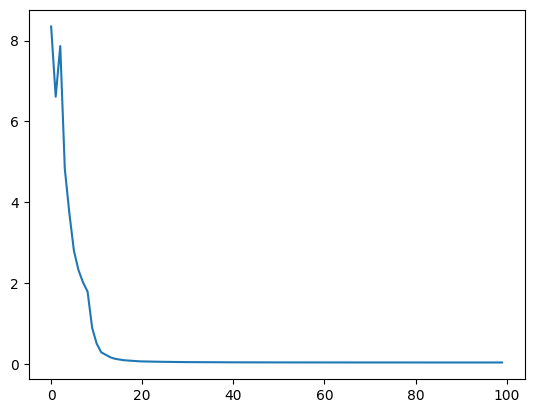

In [8]:
import torch, torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
from torch.optim.lr_scheduler import StepLR

# define input size, hidden layer size, output size
D_i, D_k, D_o = 10, 40, 1
# create model with two hidden layers
model = nn.Sequential(
    nn.Linear(D_i, D_k),
    nn.ReLU(),
    nn.Linear(D_k, D_k),
    nn.ReLU(),
    nn.Linear(D_k, D_o),
    nn.Sigmoid())

# He initialization of weights
def weights_init(layer_in):
    if isinstance(layer_in, nn.Linear):
        nn.init.kaiming_normal_(layer_in.weight)
        layer_in.bias.data.fill_(0.0)

model.apply(weights_init)

# choose binary cross entropy loss for binary classification
criterion = nn.BCELoss()
# construct SGD optimizer and initialize learning rate and momentum
optimizer = torch.optim.SGD(model.parameters(), lr = 0.1, momentum=0.9)
# object that decreases learning rate by half every 10 epochs
scheduler = StepLR(optimizer, step_size=10, gamma=0.5)

# create 100 random data points and store in data loader class
x = torch.randn(100, D_i)
# create random labels
y = torch.randint(0, 2, (100, D_o), dtype=torch.float32)
data_loader = DataLoader(TensorDataset(x,y), batch_size=10, shuffle=True)

losses = []

# loop over the dataset 100 times
for epoch in range(100):
    epoch_loss = 0.0
    # loop over batches
    for i, data in enumerate(data_loader):
        # retrieve inputs and labels for this batch
        x_batch, y_batch = data
        # zero the parameter gradients
        optimizer.zero_grad()
        # forward pass
        pred = model(x_batch)
        loss = criterion(pred, y_batch)
        # backward pass
        loss.backward()
        # SGD update
        optimizer.step()
        # update statistics
        epoch_loss += loss.item()
    
    # compute accuracy
    accuracy = (pred.round() == y_batch).float().mean()    
    
    # print error
    print(f'Epoch {epoch:5d}, loss {epoch_loss:.3f}, accuracy {accuracy:.3f}')
    # tell scheduler to consider updating learning rate
    scheduler.step()
    
    losses.append(epoch_loss)
    
# plot loss
import matplotlib.pyplot as plt

plt.plot(losses)